# Logistic regression model - Fraud credit card

<font size='3'>

Hello there, the next project is based on the next synthetic fraud data about transactions made with credit card by the simulator **PaySim** who simulate this information from private anomic data provided by a Multinational Company for later inject malicious transactions to evaluate fraud detection methods. 

All details about this dataset could be find in the following Kaggle url:

https://www.kaggle.com/datasets/ealaxi/paysim1


The main purpose is build a logistic regression model to detect if a transaction is fraud or not and visualize a clear case of overfitting due to imbalance unbalanced dataset.

PD: This project was worked with codecademy ML path.

The next descriptions taken from the url attached above, will be useful to get a best understanding over the features and target variable.

### General data

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

* __step__: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
<br/><br/>
    
* __type__: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
<br/><br/>
    
* __amount__: amount of the transaction in local currency.
<br/><br/>

* __nameOrig__: customer who started the transaction
<br/><br/>

* __oldbalanceOrg__: initial balance before the transaction
<br/><br/>
    
* __newbalanceOrig__: new balance after the transaction
<br/><br/>

* __nameDest__: customer who is the recipient of the transaction
<br/><br/>

* __oldbalanceDest__: initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
<br/><br/>

* __newbalanceDest__: new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
<br/><br/>

* __isFraud__: This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
<br/><br/>

* __isFlaggedFraud__: The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

</font>


# Exploratory Data Analysis (EDA)

Let's take a general look into the features:

In [1]:
# Import classic packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# Step 2: Import the csv final file and check the data structure:
data_transactions = pd.read_csv('fraudData.csv')
data_transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
print('Total rows and columns: {}'.format(data_transactions.shape))

Total rows and columns: (6362620, 11)


In [4]:
for i in (data_transactions.columns):
    print('Column {} and number of records: {}'.format(i, data_transactions[i].value_counts().sum()))

Column step and number of records: 6362620
Column type and number of records: 6362620
Column amount and number of records: 6362620
Column nameOrig and number of records: 6362620
Column oldbalanceOrg and number of records: 6362620
Column newbalanceOrig and number of records: 6362620
Column nameDest and number of records: 6362620
Column oldbalanceDest and number of records: 6362620
Column newbalanceDest and number of records: 6362620
Column isFraud and number of records: 6362620
Column isFlaggedFraud and number of records: 6362620


In [5]:
for i in (data_transactions.columns):
    print('Column {} and number of its NA values: {}'.format(i, data_transactions[i].isna().sum()))

Column step and number of its NA values: 0
Column type and number of its NA values: 0
Column amount and number of its NA values: 0
Column nameOrig and number of its NA values: 0
Column oldbalanceOrg and number of its NA values: 0
Column newbalanceOrig and number of its NA values: 0
Column nameDest and number of its NA values: 0
Column oldbalanceDest and number of its NA values: 0
Column newbalanceDest and number of its NA values: 0
Column isFraud and number of its NA values: 0
Column isFlaggedFraud and number of its NA values: 0


<font size='3'>
With this last command, We can determine that is not necessary remove or adjust missing values.
<br></br>    
Now, We visualize the kind of data variables:
</font>

In [6]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<font size='3'>
Then, review the distribution over numerical variables, taking into account that certain categorical variables as
<b>nameOrig</b> or <b>nameDest</b> for instance, aren't relevant to our analysis:
<br></br>    
</font>

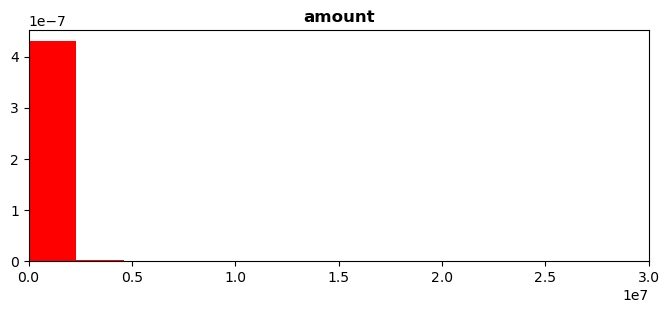

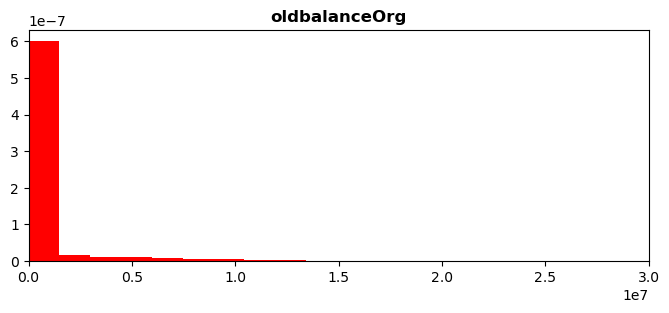

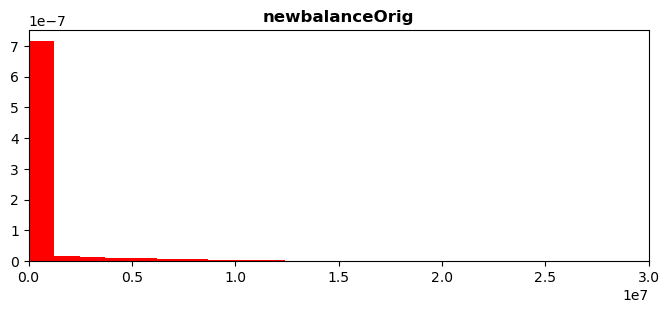

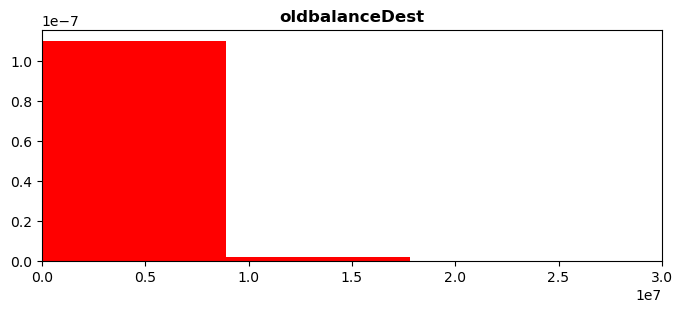

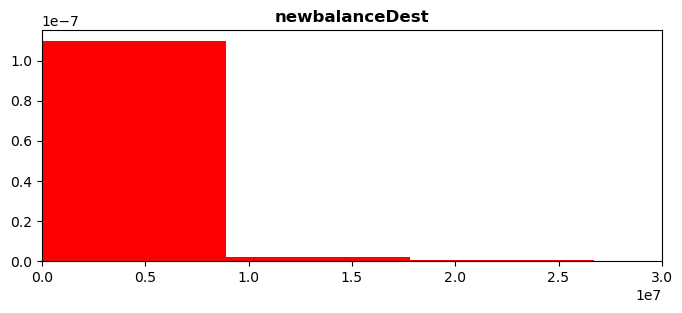

In [7]:
columns_dataset = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for j in columns_dataset:
    plt.figure(figsize=(8, 3))
    plt.title(j, fontweight ="bold")
    data_transactions[j].hist(bins=40, color = 'red', density = True, histtype ='bar')
    plt.grid(visible = None)
    plt.xlim(0, 30000000)
    plt.show()

<font size='3'>
As you can see, this features has a strong concentration with few outliers.
<br></br>    
Moreover, We'll graph the distribution between <b>fraud</b> and <b>not fraud</b>:
</font>

In [8]:
sns.set()

In [9]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
outcomes = ['isFraud', 'isFlaggedFraud']

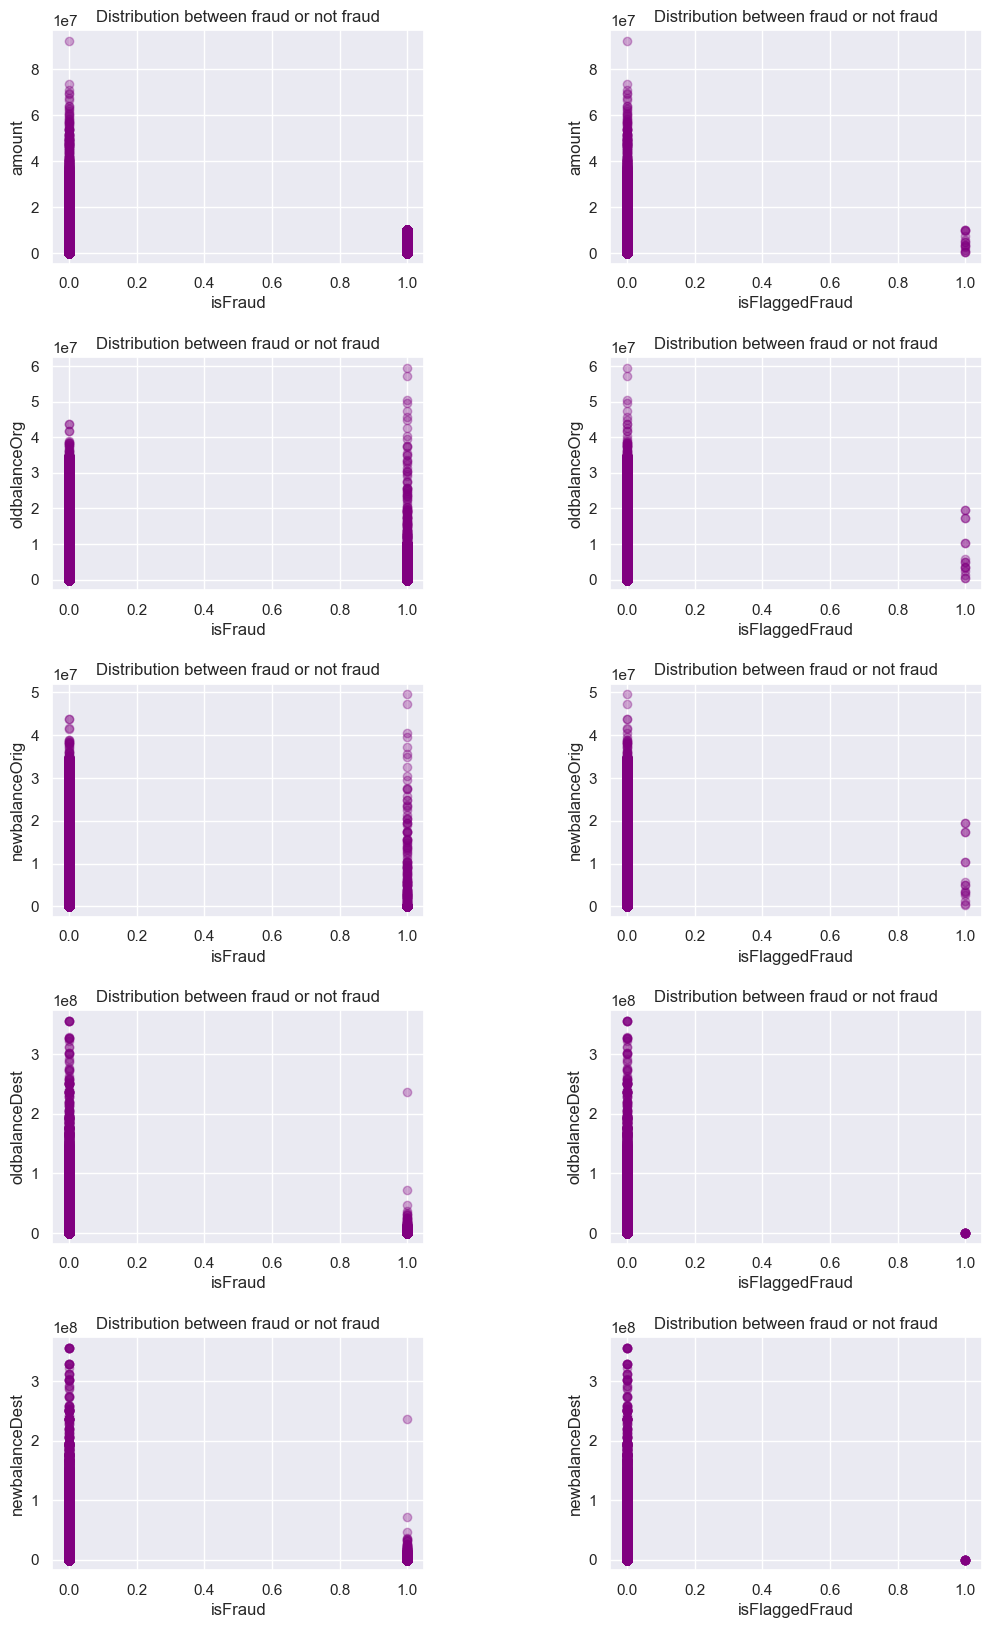

In [10]:
plt.figure(figsize=(12, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        #print(1+i*len(outcomes)+j)
        plt.scatter(data_transactions[outcomes[j]], data_transactions[features[i]], alpha=0.33, color = 'purple')
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Distribution between fraud or not fraud')
plt.show()

<font size='3'>
As you can see, this features show us an importane unbalance targets due to the nature of the business case.
<br></br>    
Therefore, in this kind of exercises, you'll need apply any special technique of under or oversampling to try reduce this unbalance classification to get a good ML model.
</font>

In [11]:
print(data_transactions['amount'].describe())

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


In [12]:
# Validate the kind of transactions:
print(data_transactions['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


<font size='3'>
Now , We gonna review the numerical concentration of transactions types and then visualize through a pie:
<br></br>    
</font>

In [13]:
print(data_transactions['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


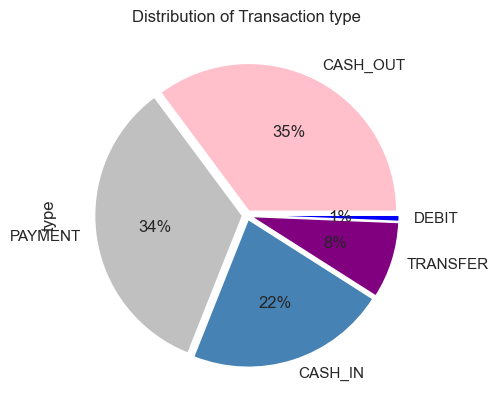

In [14]:
colors = ['pink', 'silver', 'steelblue', 'purple', 'blue']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

data_transactions['type'].value_counts().plot.pie(colors=colors, autopct='%1.0f%%', explode=explode)
plt.title("Distribution of Transaction type")
plt.show()

<font size='3'>
According to this visualization, We were focusing into Cash oout and transfer transactions (normally the fraud are made in this groups).
<br></br>    
</font>

# Data cleaning and settings:

#### We gonna create new features and modify anyone of the current columns:

In [15]:
# Create isPayment field
data_transactions['isPayment']  = np.where(
  ((data_transactions['type'] == 'PAYMENT') | (data_transactions['type'] == 'DEBIT')) ,1 ,0)

In [16]:
data_transactions['accountDiff'] = data_transactions['oldbalanceOrg'] - data_transactions['oldbalanceDest']

In [17]:
# Create isMovement field
data_transactions['isMovement']  = np.where(
  ((data_transactions['type'] == 'CASH_OUT') | (data_transactions['type'] == 'TRANSFER')) ,1 ,0)

In [18]:
print(data_transactions.tail(10))

         step      type      amount     nameOrig  oldbalanceOrg  \
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362611   742  CASH_OUT    63416.99   C994950684       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362610             0.0  C1812552860            0.00            0.00        1   
6362611             0.0  C1662241365       276433.18       339850.17        1   
6362612            

<font size='3'>
Now, we'll define the features and outcomes data to train the Logistic Regression model:
<br></br>    
</font>

In [19]:
# Create features and label variables
feature = data_transactions[['amount', 'isPayment', 'isMovement','accountDiff']]
print(feature)

             amount  isPayment  isMovement  accountDiff
0           9839.64          1           0    170136.00
1           1864.28          1           0     21249.00
2            181.00          0           1       181.00
3            181.00          0           1    -21001.00
4          11668.14          1           0     41554.00
...             ...        ...         ...          ...
6362615   339682.13          0           1    339682.13
6362616  6311409.28          0           1   6311409.28
6362617  6311409.28          0           1   6242920.44
6362618   850002.52          0           1    850002.52
6362619   850002.52          0           1  -5660096.59

[6362620 rows x 4 columns]


In [20]:
label = data_transactions.isFraud

In [21]:
print(data_transactions.tail(10))

         step      type      amount     nameOrig  oldbalanceOrg  \
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362611   742  CASH_OUT    63416.99   C994950684       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362610             0.0  C1812552860            0.00            0.00        1   
6362611             0.0  C1662241365       276433.18       339850.17        1   
6362612            

## Traning model and overfitting evidence

In [22]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3)

In [23]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
logistic_model = LogisticRegression()

In [25]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

<font size='3'>
Now, we gonna determine the score (accuracy of the fit and predict process to this training model), and get the coeficients associated to the general equation and the respective probabilities:
<br></br>    
</font>

In [26]:
print(logistic_model.score(X_train, y_train))

0.9988630020786585


In [27]:
print(logistic_model.score(X_test, y_test))

0.9988579128304588


In [28]:
print(logistic_model.coef_)

[[ 0.21415578 -3.71843799 23.46364193  6.40426768]]


In [33]:
predictions = logistic_model.predict(X_test)
print(logistic_model.predict(X_test))

[0 0 0 ... 0 0 0]


In [34]:
print(logistic_model.predict_proba(X_test))

[[9.99068768e-01 9.31231781e-04]
 [1.00000000e+00 4.27070889e-22]
 [9.99029558e-01 9.70442239e-04]
 ...
 [1.00000000e+00 4.80845658e-27]
 [1.00000000e+00 4.96566834e-27]
 [1.00000000e+00 7.88602067e-24]]


In [35]:
confusion_matrix(y_test, predictions)

array([[1906301,      49],
       [   2131,     305]])

## Conclussion

<font size='3'>

As you see along this notebook and specially on the score functions to the training and test set, this model is suffering of overfitting thanks to the unbalance data about target variable <b>Fraud</b>.
<br></br>    
To that, you can apply the  <b>SMOTE</b> technique related with oversampling and undersampling to try decrease the unbalanced data problem. One example could the Project 1 - Loan default prediction referenced inside the same ML folder in my personal github 
    
</font>

## References

<font size='3'>

[1] Kaggle.com, López-Rojas E.(2017). Synthetic Financial Datasets For Fraud Detection. Taken from: https://www.kaggle.com/datasets/ealaxi/paysim1


[2] Codecademy, (2023). Fraud card detection project exercise. Taken from: https://codecademy.com
</font>


